# Purpose

Just testing my intuition w.r.t. degrees of freedom in the students T distribution.

- Cauchy: df = 1.
- Normal: df = infinity (or at least some really high number)

This should be reflected when using PyMC3.

In [8]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
normal = np.random.normal(size=20000)
cauchy = np.random.standard_cauchy(size=20000)

In [10]:
with pm.Model() as normal_model:
    mu = pm.Normal("mu", mu=0, sd=100)
    sd = pm.HalfNormal("sd", sd=100)
    nu = pm.Exponential("nu", lam=0.5)
    like = pm.StudentT("like", mu=mu, sd=sd, nu=nu, observed=normal)

    trace = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sd, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 16000/16000 [00:20<00:00, 790.93draws/s] 


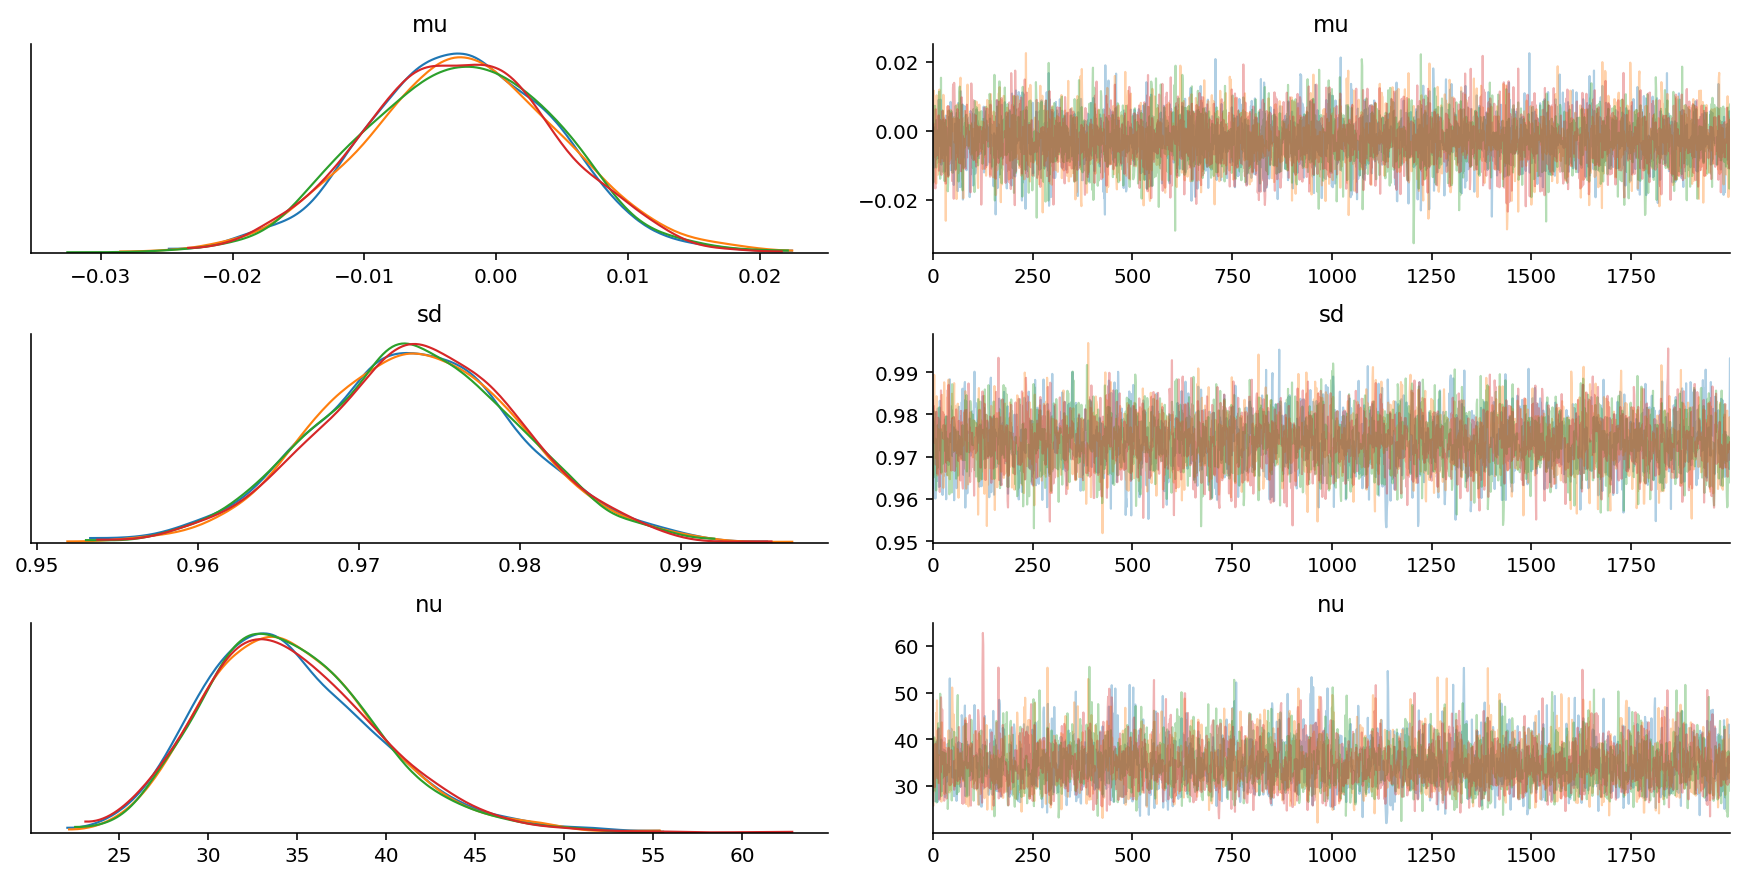

In [12]:
axes = az.plot_trace(trace)

Many degrees of freedom for normal distribution. Makes sense.

In [13]:
with pm.Model() as cauchy_model:
    mu = pm.Normal("mu", mu=0, sd=100)
    sd = pm.HalfNormal("sd", sd=100)
    nu = pm.Exponential("nu", lam=1)
    like = pm.StudentT("like", mu=mu, sd=sd, nu=nu, observed=cauchy)

    trace = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sd, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 16000/16000 [00:22<00:00, 709.93draws/s]


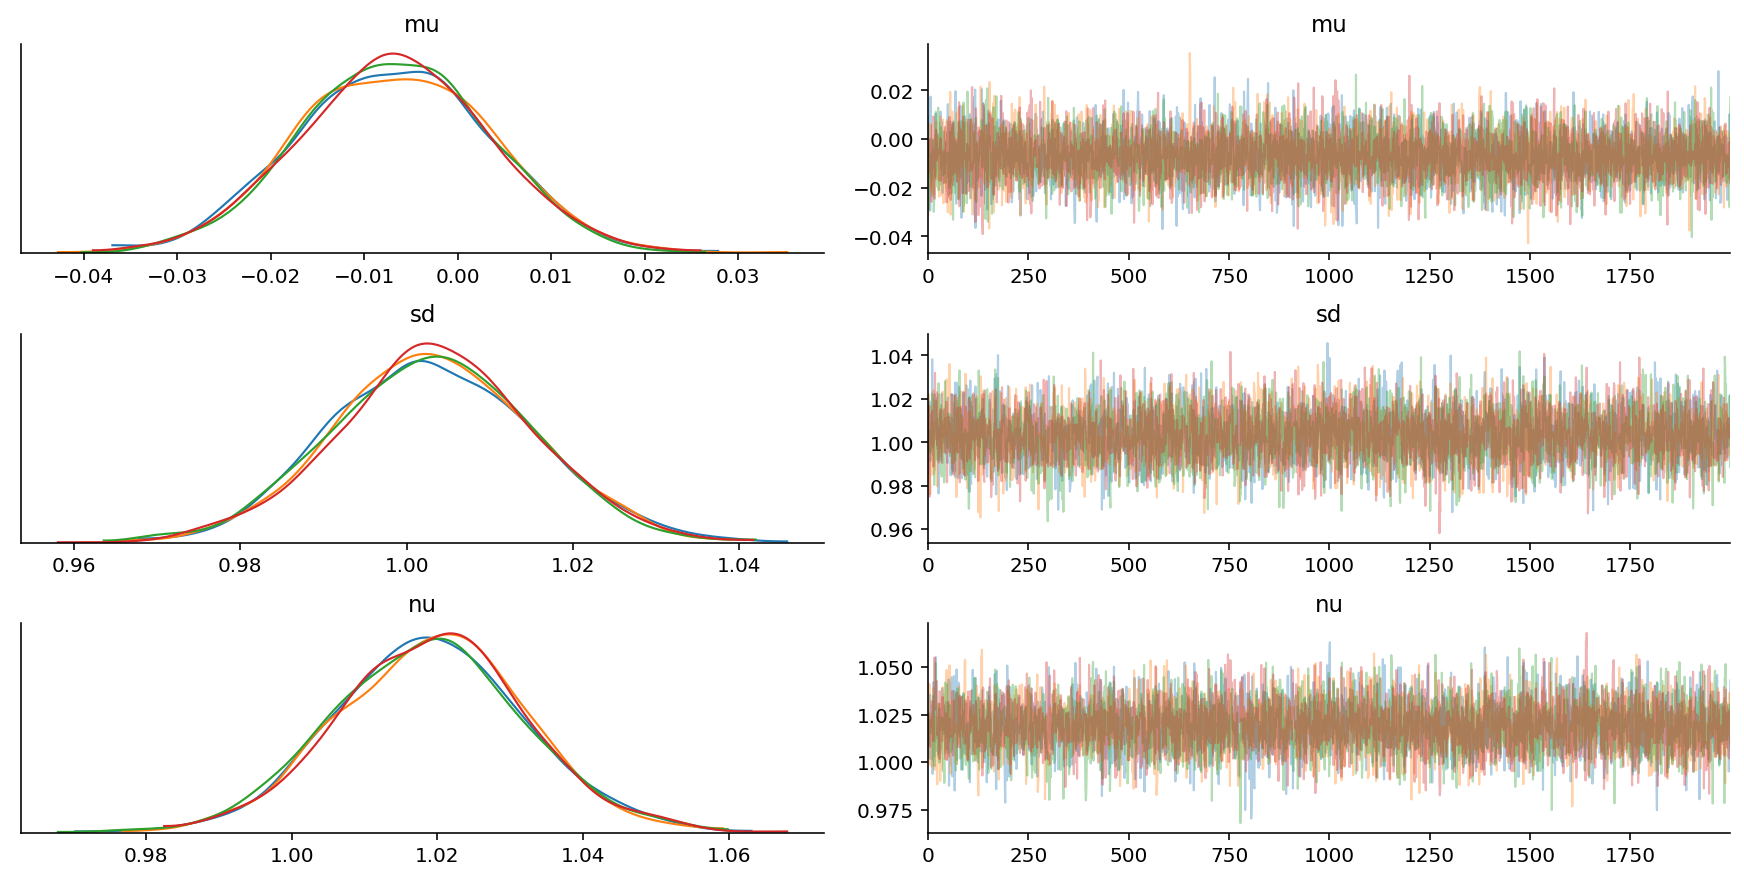

In [15]:
axes = az.plot_trace(trace)

Basically 1 degree of freedom when inferring $\nu$ from Cauchy-distributed data. Yes :).